# Analysing used car data to get meaningful insights


Import data sets using pandas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %pip install pandas seaborn matplotlib numpy


In [2]:
# File path to read csv
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers= ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(file_path,names=headers)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df.replace('?',np.NaN,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df['price']=df['price'].astype(float)

In [6]:
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['normalized-losses']=df['normalized-losses'].astype(float)


In [7]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
df['stroke']=df['stroke'].astype(float)
df['bore']=df['bore'].astype(float)

In [9]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
avg=df['normalized-losses'].mean()
df['normalized-losses'].replace(np.NaN,avg,inplace=True)

C:\Users\Mayank chouhan\AppData\Local\Temp\ipykernel_29460\2204189516.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].replace(np.NaN,avg,inplace=True)


In [12]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [13]:
vals=df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.NaN,vals,inplace=True)

C:\Users\Mayank chouhan\AppData\Local\Temp\ipykernel_29460\1339298548.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace(np.NaN,vals,inplace=True)


In [14]:
avgs_1=df['horsepower'].mean()
df['horsepower'].replace(np.NaN,avgs_1,inplace=True)
avgs_2=df['bore'].mean()
df['bore'].replace(np.NaN,avgs_2,inplace=True)
avgs_3=df['stroke'].mean()
df['stroke'].replace(np.NaN,avgs_3,inplace=True)
avgs_4=df['peak-rpm'].value_counts().idxmax()
df['peak-rpm'].replace(np.NaN,avgs_4,inplace=True)





C:\Users\Mayank chouhan\AppData\Local\Temp\ipykernel_29460\3317570514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace(np.NaN,avgs_1,inplace=True)
C:\Users\Mayank chouhan\AppData\Local\Temp\ipykernel_29460\3317570514.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [15]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Data Standardization

Modify Some columns values to meet the perspective required

In [16]:
df['city-L/100']=235/df['city-mpg']
df.drop(columns=['city-mpg'],inplace=True)
df['highway-L/100']=235/df['highway-mpg']
df.drop(columns=['highway-mpg'],inplace=True)

### Data Normalisation
***Normalisation is process of scaling the multiple variables into a similar range***

In [17]:
# Simple Normalisation Method
df['length']=df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()


In [18]:
# Min - Max method
df['height']=(df['height']-df['height'].min())/(df['height'].max()-df['height'].min())



In [19]:
# Bins
# Transforming continuous values into discrete categorical bins

In [20]:
df['horsepower']=df['horsepower'].astype(int,copy=True)

Text(0.5, 1.0, 'Horsepower bins')

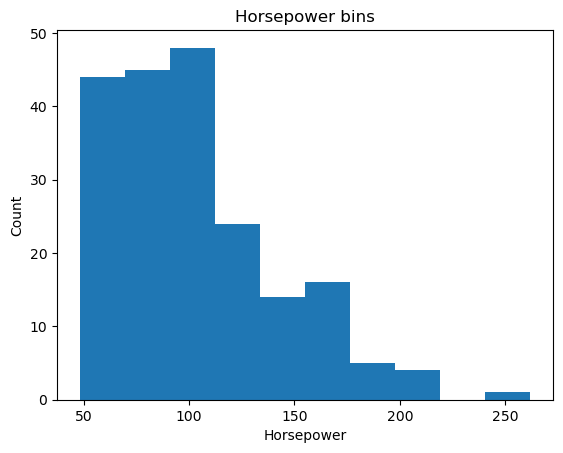

In [21]:
plt.hist(df['horsepower'])
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Horsepower bins')

In [22]:
bins=np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)
labels=['Low','Medium','High']
df['horsepower-label']=pd.cut(df['horsepower'],bins,labels=labels,include_lowest=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100,highway-L/100,horsepower-label
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Low


In [23]:
df['horsepower-label'].value_counts()

horsepower-label
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

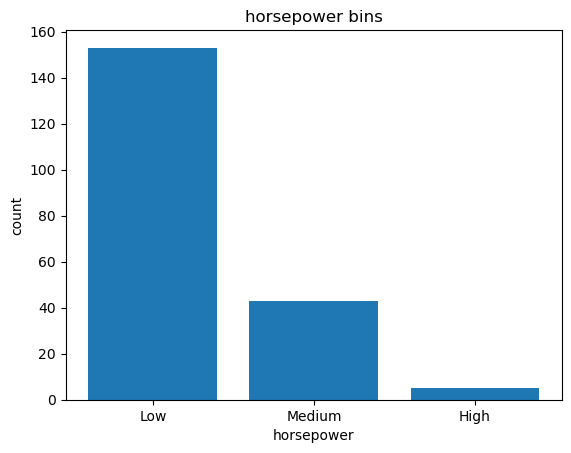

In [24]:
plt.bar(labels,df['horsepower-label'].value_counts())
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


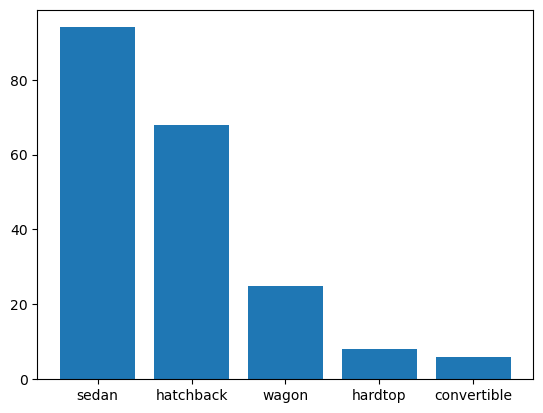

In [ ]:
label_=['sedan','hatchback','wagon','hardtop','convertible']
plt.bar(label_,df['body-style'].value_counts())

In [25]:
# Indicator Variable
# Dummy is used for categorical data to divide it into different columns and value with 0,1
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price', 'city-L/100',
       'highway-L/100', 'horsepower-label'],
      dtype='object')

In [26]:
dummies=pd.get_dummies(df,columns=['aspiration'])

In [27]:
dummies.head(5)


,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100,highway-L/100,horsepower-label,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,Low,True,False
1,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Low,True,False
2,1,122.0,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium,True,False
3,2,164.0,audi,gas,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Low,True,False
4,2,164.0,audi,gas,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Low,True,False


In [28]:
df=dummies

In [29]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100,highway-L/100,horsepower-label,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,Low,True,False
1,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Low,True,False
2,1,122.0,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium,True,False
3,2,164.0,audi,gas,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Low,True,False
4,2,164.0,audi,gas,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Low,True,False


In [30]:
# df.to_csv('Used_Car_Data')

In [31]:
# Right way to visualise data
numeric_data=df.select_dtypes(include=['float64','int64'])
numeric_data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,price,city-L/100,highway-L/100
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.279849,-0.082391,0.066171,-0.029807
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.238789,0.133999,0.238567,0.181189
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,-0.362642,0.584642,0.476153,0.577576
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,-0.281932,0.690628,0.657373,0.707108
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,-0.242569,0.751265,0.673363,0.736728
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.311922,0.135486,0.003811,0.084301
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,-0.279027,0.834415,0.785353,0.836921
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,-0.254961,0.872335,0.745059,0.783465
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,-0.262650,0.543154,0.554726,0.559197
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,-0.047295,0.082267,0.036285,0.047199


In [33]:
df[['bore','horsepower','stroke','compression-ratio']].corr()

,bore,horsepower,stroke,compression-ratio
bore,1.000000,0.566786,-0.055390,0.001250
horsepower,0.566786,1.000000,0.097598,-0.214392
stroke,-0.055390,0.097598,1.000000,0.187854
compression-ratio,0.001250,-0.214392,0.187854,1.000000


(0.0, 53820.91878740432)

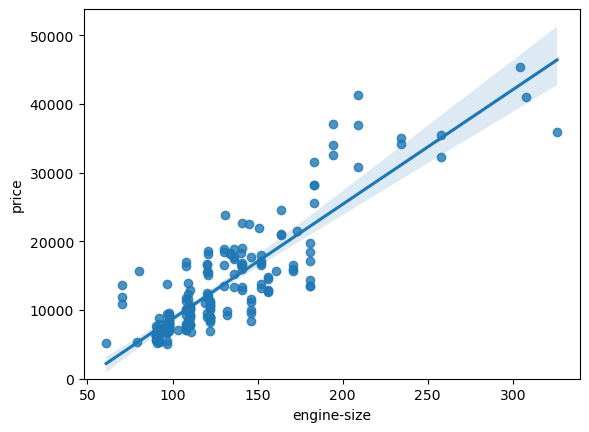

In [35]:
# Plotting a regression graph
sns.regplot(x='engine-size',y='price',data=df)
plt.ylim(0)

In [ ]:
# Positive coorelation between price and engine
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


,highway-L/100,price
highway-L/100,1.000000,0.801118
price,0.801118,1.000000


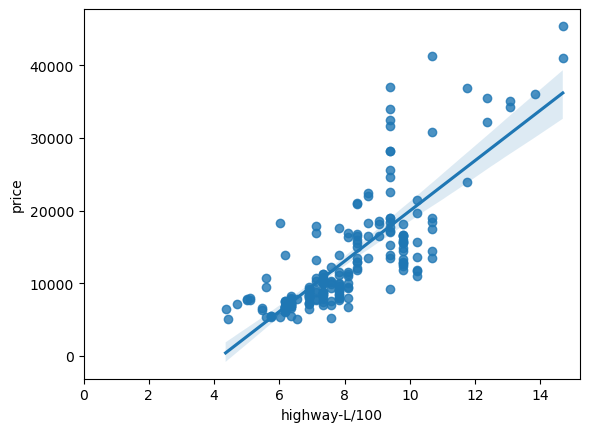

In [38]:
# Plotting reggplot for highmpg and price
sns.regplot(x='highway-L/100',y='price',data=df)
plt.xlim(0)
df[['highway-L/100','price']].corr()

In [39]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


           price    stroke
price   1.000000  0.082267
stroke  0.082267  1.000000


(0.0, 47414.1)

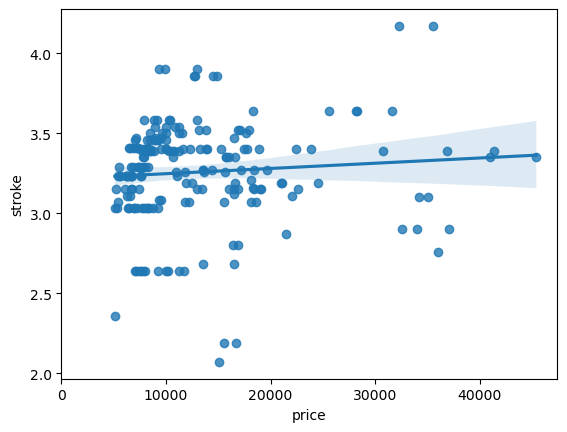

In [ ]:
sns.regplot(x='price',y='stroke',data=df)
plt.xlim(0)

<Axes: xlabel='body-style', ylabel='price'>

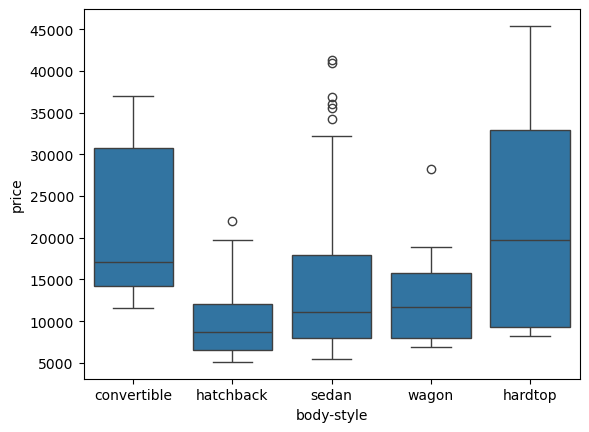

In [42]:
sns.boxplot(x='body-style',y='price',data=df)


<Axes: xlabel='engine-location', ylabel='price'>

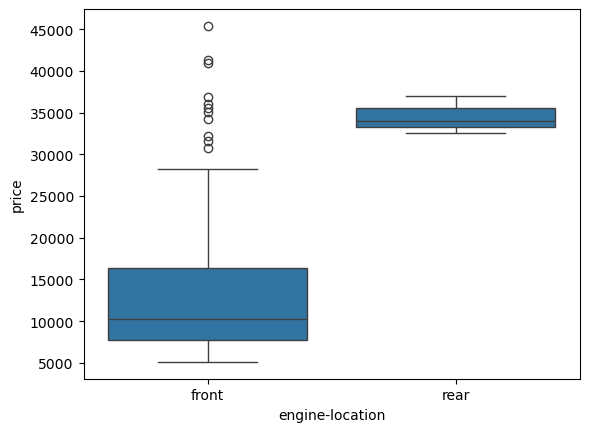

In [44]:
sns.boxplot(x='engine-location',y='price',data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

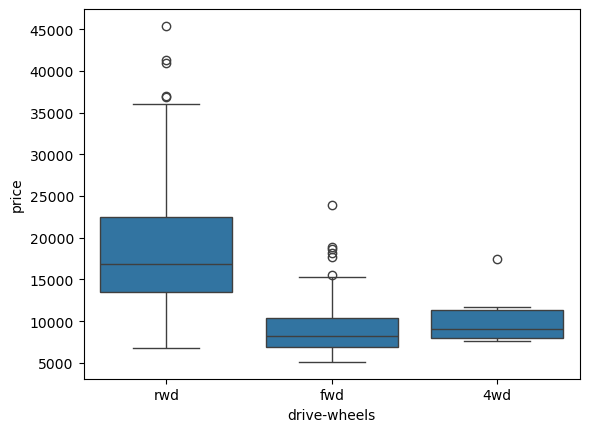

In [45]:
sns.boxplot(x='drive-wheels',y='price',data=df)

In [59]:
import sqlite3
%load_ext sql
import prettytable
prettytable.DEFAULT='DEFAULT'
conn=sqlite3.Connection('Used_Car_Data.db')
cursor=conn.cursor()
%sql sqlite:///Used_Car_Data.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [56]:
df.to_sql('Used_Car',conn,index=False)


201

In [58]:
query='''Select name from sqlite_master where type='table' '''
output=cursor.execute(query)
print(cursor.fetchall())

[('Used_Car',)]


In [66]:
%sql SELECT make,Round(AVG(price),2) as average_brand_price FROM USED_CAR group by make  

 * sqlite:///Used_Car_Data.db
Done.


make,average_brand_price
alfa-romero,15498.33
audi,17859.17
bmw,26118.75
chevrolet,6007.0
dodge,7875.44
honda,8184.69
isuzu,8916.5
jaguar,34600.0
mazda,10652.88
mercedes-benz,33647.0


In [67]:
df.head()

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100,highway-L/100,horsepower-label,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,Low,True,False
1,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Low,True,False
2,1,122.0,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium,True,False
3,2,164.0,audi,gas,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Low,True,False
4,2,164.0,audi,gas,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Low,True,False


In [73]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)


,count
engine-location,
front,198
rear,3


In [75]:
df.groupby('body-style')['price'].mean()

body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon          12371.960000
Name: price, dtype: float64